In [1]:
from datetime import datetime 
import pandas as pd 
import matplotlib.pylab as plt 
%matplotlib inline  
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 4

In [2]:
dataset=pd.read_excel('Time series for STat Take Home test.xlsx',sep='delimiter')

In [3]:
dataset

,week,Rev from a Sport Store retail
0,15-W01,9.956822e+05
1,15-W02,1.175470e+06
2,15-W03,1.406700e+06
3,15-W04,1.042557e+06
4,15-W05,1.268013e+06
5,15-W06,1.155386e+06
6,15-W07,1.323854e+06
7,15-W08,1.497653e+06
8,15-W09,1.551531e+06
9,15-W10,1.608355e+06


In [4]:
dataset=dataset.round(3)
dataset

,week,Rev from a Sport Store retail
0,15-W01,995682.233
1,15-W02,1175469.773
2,15-W03,1406700.118
3,15-W04,1042556.546
4,15-W05,1268013.120
5,15-W06,1155386.379
6,15-W07,1323853.843
7,15-W08,1497652.871
8,15-W09,1551530.672
9,15-W10,1608355.308


In [5]:
indexedDataset = dataset.set_index(['week'])

In [6]:
indexedDataset.head(5)

,Rev from a Sport Store retail
week,
15-W01,995682.233
15-W02,1175469.773
15-W03,1406700.118
15-W04,1042556.546
15-W05,1268013.120


In [7]:
test=indexedDataset[271:280]
test

,Rev from a Sport Store retail
week,
test_-W11,NaN
test_-W12,NaN
test_-W13,NaN
test_-W14,NaN
test_-W15,NaN
test_-W16,NaN
test_-W17,NaN
test_-W18,NaN
test_-W19,NaN


In [8]:
dataset=indexedDataset.dropna()
dataset

,Rev from a Sport Store retail
week,
15-W01,995682.233
15-W02,1175469.773
15-W03,1406700.118
15-W04,1042556.546
15-W05,1268013.120
15-W06,1155386.379
15-W07,1323853.843
15-W08,1497652.871
15-W09,1551530.672


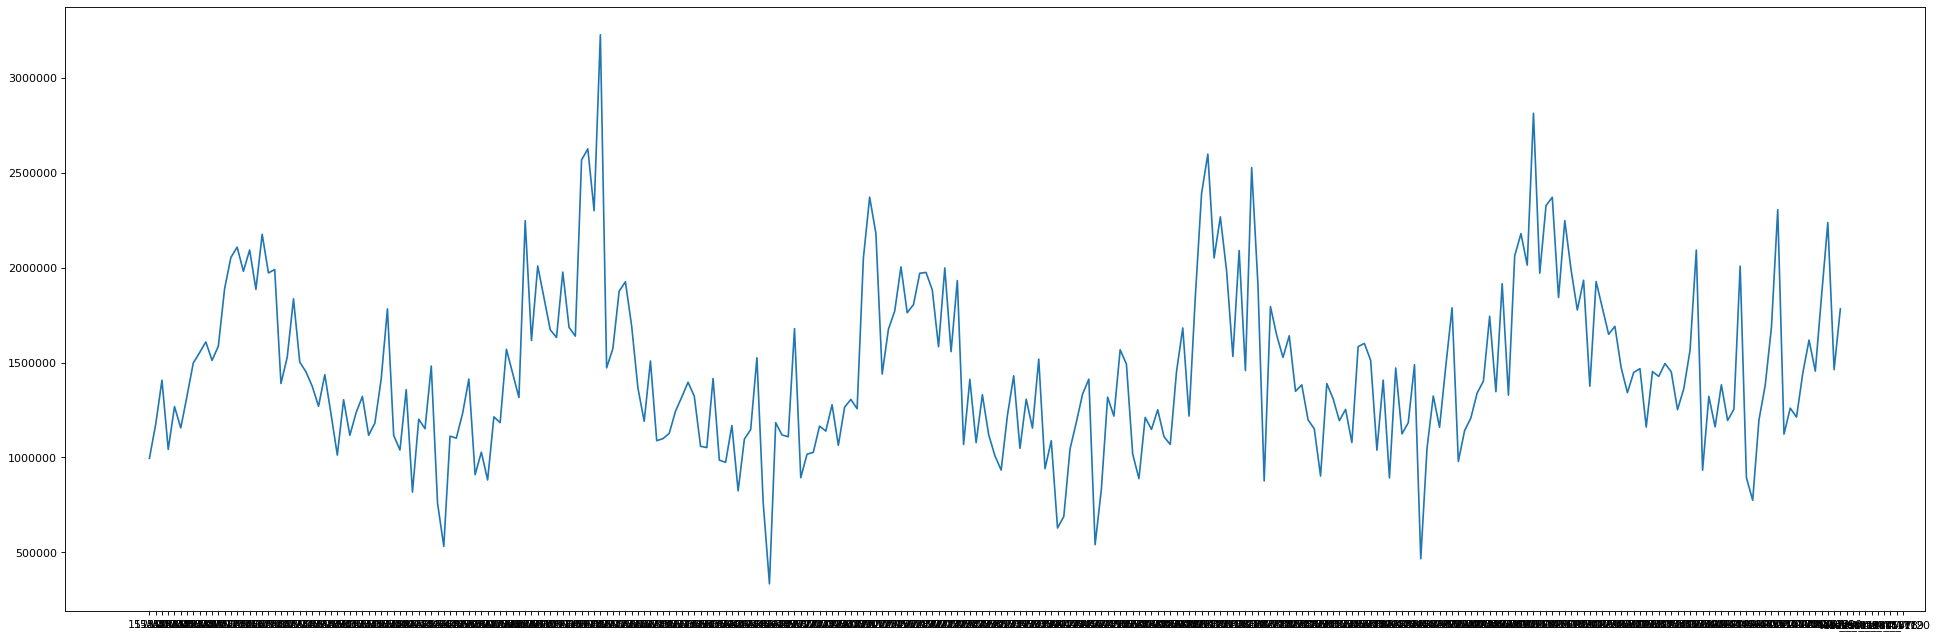

In [9]:
plt.figure(num=None, figsize=(30, 10), dpi=80, facecolor='w', edgecolor='k')
plt.plot(indexedDataset)

In [10]:
#Determine rolling statistics
rolmean =dataset.rolling(window=12).mean() 
rolstd = dataset.rolling(window=12).std()
print(rolmean,rolstd)

        Rev from a Sport Store retail
week                                 
15-W01                            NaN
15-W02                            NaN
15-W03                            NaN
15-W04                            NaN
15-W05                            NaN
15-W06                            NaN
15-W07                            NaN
15-W08                            NaN
15-W09                            NaN
15-W10                            NaN
15-W11                            NaN
15-W12                   1.343562e+06
15-W13                   1.417942e+06
15-W14                   1.491074e+06
15-W15                   1.549495e+06
15-W16                   1.627658e+06
15-W17                   1.696389e+06
15-W18                   1.757207e+06
15-W19                   1.828167e+06
15-W20                   1.867672e+06
15-W21                   1.904200e+06
15-W22                   1.885981e+06
15-W23                   1.887393e+06
15-W24                   1.908135e+06
15-W25      

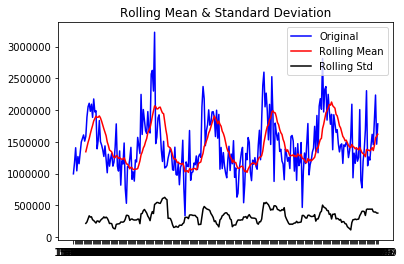

In [11]:
#Plot rolling statistics
orig = plt.plot(dataset, color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

From the above graph, we see that rolling mean itself has a trend component even though rolling standard deviation is fairly constant with time. For our time series to be stationary, we need to ensure that both the rolling statistics ie: mean & std. dev. remain time invariant or constant with time. Thus the curves for both of them have to be parallel to the x-axis, which in our case is not so.
To further augment our hypothesis that the time series is not stationary, let us perform the ADCF test.

In [12]:
dftest=adfuller(dataset['Rev from a Sport Store retail'], autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

Test Statistic                  -4.368407
p-value                          0.000337
#Lags Used                       9.000000
Number of Observations Used    261.000000
Critical Value (1%)             -3.455656
Critical Value (5%)             -2.872678
Critical Value (10%)            -2.572705
dtype: float64


For a Time series to be stationary, its ADCF test should have:

p-value to be low (according to the null hypothesis)

The critical values at 1%,5%,10% confidence intervals should be as close as possible to the Test Statistics


Critical values are no where close to the Test Statistics. Hence, we can safely say that our Time Series at the moment is not stationary

# Log Transformation

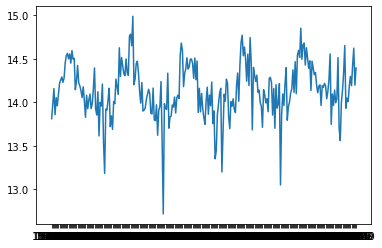

In [13]:
dataset_logScale = np.log(dataset)
plt.plot(dataset_logScale)

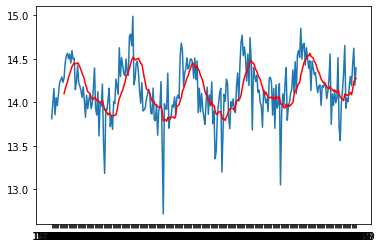

In [14]:
movingAverage = dataset_logScale.rolling(window=12).mean()
movingSTD = dataset_logScale.rolling(window=12).std()
plt.plot(dataset_logScale)
plt.plot(movingAverage, color='red')

From above graph, we see that even though rolling mean is not stationary, it is still better than the previous case, where no transfromation were applied to series. So we can atleast say that we are heading in the right direction.

We know from above graph that both the Time series with log scale as well as its moving average have a trend component. Thus we can apply a elementary intuition: subtraction one from the other should remove the trend component of both. Its like:

logscaleL=stationarypart(L1)+trend(LT) 

movingavgoflogscaleA=stationarypart(A1)+trend(AT)

resultseriesR=L−A=(L1+LT)−(A1+AT)=(L1−A1)+(LT−AT) 

Since, L & A are series & it moving avg, their trend will be more or less same, Hence
LT-AT nearly equals to 0

Thus trend component will be almost removed. And we have,

R=L1−A1 , our final non-trend curve

In [15]:
datasetLogScaleMinusMovingAverage = dataset_logScale - movingAverage
datasetLogScaleMinusMovingAverage.head(12)

#Remove NAN values
datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head(10)

,Rev from a Sport Store retail
week,
15-W12,0.178562
15-W13,0.299364
15-W14,0.336581
15-W15,0.329173
15-W16,0.213433
15-W17,0.226820
15-W18,0.081556
15-W19,0.183339
15-W20,0.062123


In [16]:
movingAverage_tr = datasetLogScaleMinusMovingAverage.rolling(window=12).mean()
movingSTD_tr = datasetLogScaleMinusMovingAverage.rolling(window=12).std()

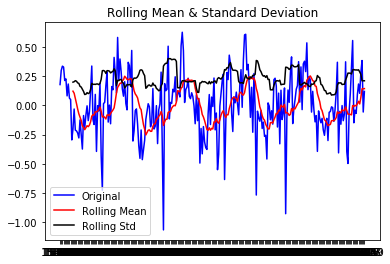

In [17]:
#Plot rolling statistics
orig = plt.plot(datasetLogScaleMinusMovingAverage, color='blue', label='Original')
mean = plt.plot(movingAverage_tr, color='red', label='Rolling Mean')
std = plt.plot(movingSTD_tr, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [18]:
dftest=adfuller(datasetLogScaleMinusMovingAverage['Rev from a Sport Store retail'], autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

Test Statistic                  -4.874116
p-value                          0.000039
#Lags Used                       9.000000
Number of Observations Used    250.000000
Critical Value (1%)             -3.456781
Critical Value (5%)             -2.873172
Critical Value (10%)            -2.572969
dtype: float64


From above graph, we observe that our intuition that "subtracting two related series having similar trend components will make the result stationary" is true. We find that:

p-value has reduced from 0.000337 to  0.000039.

The critical values at 1%,5%,10% confidence intervals are pretty close to the Test Statistic. Thus, from above 2 points, we can say that our given series is stationary.

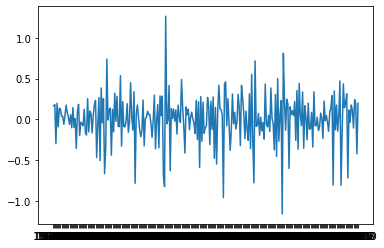

In [19]:
datasetLogDiffShifting = dataset_logScale - dataset_logScale.shift()
plt.plot(datasetLogDiffShifting)

In [72]:
datasetLogDiffShifting.head()

,Rev from a Sport Store retail
week,
15-W02,0.165995
15-W03,0.179579
15-W04,-0.299571
15-W05,0.195775
15-W06,-0.093016


In [25]:
datasetLogDiffShifting.dropna(inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Autocorrelation Function')

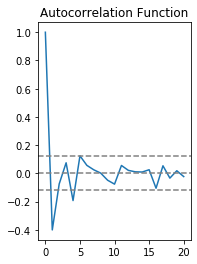

In [26]:
#ACF & PACF plots

lag_acf = acf(datasetLogDiffShifting, nlags=20)

#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')                  

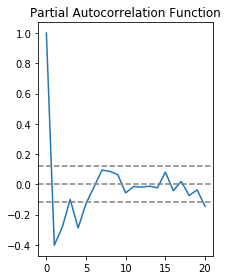

In [28]:
#Plot PACF

lag_pacf = pacf(datasetLogDiffShifting, nlags=20, method='ols')

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')
            
plt.tight_layout()  

From the ACF graph, we see that curve touches y=0.0 line at x=1. Thus, from theory, Q = 1 From the PACF graph, we see that curve touches y=0.0 line at x=1. Thus, from theory, P = 1

ARIMA is AR + I + MA. Before, we see an ARIMA model, let us check the results of the individual AR & MA model. Note that, these models will give a value of RSS. Lower RSS values indicate a better model.

# Building Models

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Plotting AR model


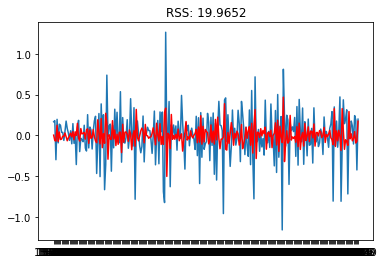

In [30]:
#AR Model
#making order=(2,1,0) gives RSS=1.5023
model = ARIMA(dataset_logScale, order=(1,1,0))
results_AR = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_AR.fittedvalues - datasetLogDiffShifting['Rev from a Sport Store retail'])**2))
print('Plotting AR model')

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Plotting MA model


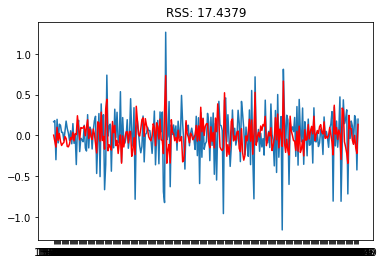

In [31]:
#MA Model
model = ARIMA(dataset_logScale, order=(0,1,1))
results_MA = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_MA.fittedvalues - datasetLogDiffShifting['Rev from a Sport Store retail'])**2))
print('Plotting MA model')

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Plotting ARIMA model


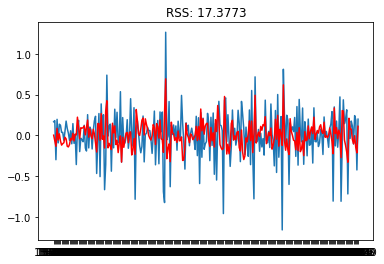

In [32]:
# AR+I+MA = ARIMA model
model = ARIMA(dataset_logScale, order=(1,1,1))
results_ARIMA = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_ARIMA.fittedvalues - datasetLogDiffShifting['Rev from a Sport Store retail'])**2))
print('Plotting ARIMA model')

By combining AR & MA into ARIMA, we see that RSS value has decreased from either case to 17.37, indicating ARIMA to be better than its individual component models.

With the ARIMA model built, we will now generate predictions. But, before we do any plots for predictions ,we need to reconvert the predictions back to original form. This is because, our model was built on log transformed data.

In [33]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

week
15-W02    0.001421
15-W03   -0.067655
15-W04   -0.134757
15-W05    0.084032
15-W06   -0.057521
dtype: float64


In [34]:
#Convert to cumulative sum
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum)

week
15-W02    0.001421
15-W03   -0.066234
15-W04   -0.200991
15-W05   -0.116958
15-W06   -0.174479
15-W07   -0.156765
15-W08   -0.225277
15-W09   -0.345622
15-W10   -0.448595
15-W11   -0.540042
15-W12   -0.563999
15-W13   -0.608710
15-W14   -0.743728
15-W15   -0.886235
15-W16   -0.999134
15-W17   -1.037964
15-W18   -1.096847
15-W19   -1.072862
15-W20   -1.141758
15-W21   -1.128414
15-W22   -1.123461
15-W23   -0.901265
15-W24   -0.804212
15-W25   -0.847013
15-W26   -0.754058
15-W27   -0.667136
15-W28   -0.573351
15-W29   -0.459331
15-W30   -0.453968
15-W31   -0.353959
            ...   
19-W33    0.479755
19-W34    0.474912
19-W35    0.444564
19-W36    0.443227
19-W37    0.532855
19-W38    0.544872
19-W39    0.470260
19-W40    0.244212
19-W41    0.578875
19-W42    0.599956
19-W43    0.694334
19-W44    0.655015
19-W45    0.717621
19-W46    0.732837
19-W47    0.459486
19-W48    0.762732
19-W49    1.059801
19-W50    1.002312
19-W51    0.877664
19-W52    0.671423
20-W01    0.341152
20-W02 

In [71]:
predictions_ARIMA_log = pd.Series(dataset_logScale['Rev from a Sport Store retail'].iloc[0], index=dataset_logScale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA_log.head()

week
15-W01    13.811183
15-W02    13.812605
15-W03    13.744950
15-W04    13.610193
15-W05    13.694225
dtype: float64

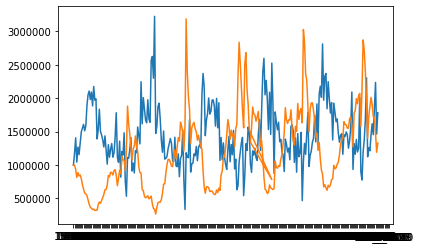

In [38]:
# Inverse of log is exp.
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(indexedDataset)
plt.plot(predictions_ARIMA)

In [70]:
predictions_ARIMA.round(3).head(10)

week
15-W01    995682.233
15-W02    997098.475
15-W03    931871.042
15-W04    814388.511
15-W05    885781.152
15-W06    836267.631
15-W07    851213.292
15-W08    794847.848
15-W09    704724.142
15-W10    635767.767
dtype: float64

In [67]:
predictions_ARIMA[10:19]

week
15-W11    580207.523033
15-W12    566472.669076
15-W13    541703.325121
15-W14    473286.017552
15-W15    410424.854111
15-W16    366608.349842
15-W17    352645.707201
15-W18    332480.611945
15-W19    340551.506007
dtype: float64